# Iris Dataset
![Iris Project](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)

### Import needed modules and set some global options

In [1]:
import keras
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib.patches import Patch

# this makes numpy suppress some scientific notation outputs
np.set_printoptions(suppress=True)

# seed the random number generator for (somewhat) reproducible results
np.random.seed(137)

Using TensorFlow backend.


### Input data looks like this (measurements in cm):

Sepal Length | Sepal Width | Petal Length | Petal Width | Class
--- | --- | --- | --- | ---
5.1 | 3.5 | 1.4 | 0.2 | 0
4.9 | 3.0 | 1.4 | 0.2 | 0
4.7 | 3.2 | 1.3 | 0.2 | 0

#### Classes: 0 = Iris Setosa, 1 = Iris Versicolor, 2 = Iris Virginica

In the input file the values are comma-separated:
`5.1,3.5,1.4,0.2,0`

https://archive.ics.uci.edu/ml/datasets/iris

### Load the dataset from disk

In [2]:
iris_data = np.loadtxt('iris.data.int', delimiter=',')

In [3]:
iris_data.shape

(150, 5)

In [4]:
iris_data[0:3]

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ]])

### Visualize Linear Separability

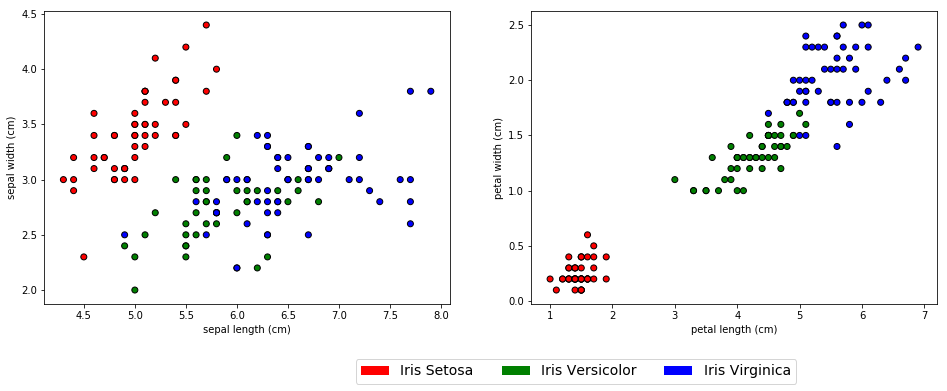

In [5]:
colors = [ 'red', 'green', 'blue' ]

fig, ax = plt.subplots(figsize=(16, 6))

ax1 = plt.subplot2grid((1, 2), (0, 0))
ax1.scatter(iris_data[:, 0], iris_data[:, 1], edgecolors='black', c=[colors[int(x)] for x in iris_data[:, 4]])
ax1.set_xlabel('sepal length (cm)')
ax1.set_ylabel('sepal width (cm)')

ax2 = plt.subplot2grid((1, 2), (0, 1))
ax2.scatter(iris_data[:, 2], iris_data[:, 3], edgecolors='black', c=[colors[int(x)] for x in iris_data[:, 4]])
ax2.set_xlabel('petal length (cm)')
ax2.set_ylabel('petal width (cm)')

labels = [ Patch(facecolor='red'), Patch(facecolor='green'), Patch(facecolor='blue') ]
fig.legend(labels, ['Iris Setosa', 'Iris Versicolor', 'Iris Virginica'],
           loc='lower center', bbox_to_anchor=(.5, 0), fontsize=14, ncol=3)

fig.subplots_adjust(bottom=0.2)

plt.show()

### Slice 45 of each type of iris for training data

In [6]:
train_data = iris_data[0:45]
train_data = np.append(train_data, iris_data[50:95], axis=0)
train_data = np.append(train_data, iris_data[100:145], axis=0)
train_data.shape

(135, 5)

### Slice 5 of each type for test data

In [7]:
test_data = iris_data[45:50]
test_data = np.append(test_data, iris_data[95:100], axis=0)
test_data = np.append(test_data, iris_data[145:150], axis=0)
test_data.shape

(15, 5)

In [8]:
test_data

array([[4.8, 3. , 1.4, 0.3, 0. ],
       [5.1, 3.8, 1.6, 0.2, 0. ],
       [4.6, 3.2, 1.4, 0.2, 0. ],
       [5.3, 3.7, 1.5, 0.2, 0. ],
       [5. , 3.3, 1.4, 0.2, 0. ],
       [5.7, 3. , 4.2, 1.2, 1. ],
       [5.7, 2.9, 4.2, 1.3, 1. ],
       [6.2, 2.9, 4.3, 1.3, 1. ],
       [5.1, 2.5, 3. , 1.1, 1. ],
       [5.7, 2.8, 4.1, 1.3, 1. ],
       [6.7, 3. , 5.2, 2.3, 2. ],
       [6.3, 2.5, 5. , 1.9, 2. ],
       [6.5, 3. , 5.2, 2. , 2. ],
       [6.2, 3.4, 5.4, 2.3, 2. ],
       [5.9, 3. , 5.1, 1.8, 2. ]])

### Separate the training data into X and y sets

In [9]:
train_X = train_data[:, 0:4]
train_y = train_data[:, 4]

### Do the same with the test data

In [10]:
test_X = test_data[:, 0:4]
test_y = test_data[:, 4]

### One hot encode the training and testing y sets

In [11]:
train_y_1h = keras.utils.np_utils.to_categorical(train_y)
test_y_1h = keras.utils.np_utils.to_categorical(test_y)
test_y_1h

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

### Define the model

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(4, activation='relu'))
#model.add(keras.layers.Dense(10, input_dim=4, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
#model.add(keras.layers.Dense(20, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

### Compile the model

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Train using the training data X and y sets

In [14]:
model.fit(train_X, train_y_1h, epochs=100, batch_size=10)

Epoch 1/100
135/135 [==============================] - 0s 3ms/step - loss: 1.0486 - acc: 0.4296
Epoch 2/100
135/135 [==============================] - 0s 231us/step - loss: 1.0155 - acc: 0.4963
Epoch 3/100
135/135 [==============================] - 0s 278us/step - loss: 0.9865 - acc: 0.5185
Epoch 4/100
135/135 [==============================] - 0s 284us/step - loss: 0.9570 - acc: 0.5481
Epoch 5/100
135/135 [==============================] - 0s 305us/step - loss: 0.9284 - acc: 0.5778
Epoch 6/100
135/135 [==============================] - 0s 236us/step - loss: 0.8990 - acc: 0.6148
Epoch 7/100
135/135 [==============================] - 0s 247us/step - loss: 0.8688 - acc: 0.6519
Epoch 8/100
135/135 [==============================] - 0s 226us/step - loss: 0.8397 - acc: 0.6741
Epoch 9/100
135/135 [==============================] - 0s 233us/step - loss: 0.8117 - acc: 0.6741
Epoch 10/100
135/135 [==============================] - 0s 236us/step - loss: 0.7871 - acc: 0.6815
Epoch 11/100
135/135 

135/135 [==============================] - 0s 278us/step - loss: 0.1941 - acc: 0.9259
Epoch 84/100
135/135 [==============================] - 0s 277us/step - loss: 0.1929 - acc: 0.9333
Epoch 85/100
135/135 [==============================] - 0s 222us/step - loss: 0.1917 - acc: 0.9185
Epoch 86/100
135/135 [==============================] - 0s 270us/step - loss: 0.1903 - acc: 0.9185
Epoch 87/100
135/135 [==============================] - 0s 237us/step - loss: 0.1867 - acc: 0.9259
Epoch 88/100
135/135 [==============================] - 0s 256us/step - loss: 0.1852 - acc: 0.9259
Epoch 89/100
135/135 [==============================] - 0s 252us/step - loss: 0.1832 - acc: 0.9333
Epoch 90/100
135/135 [==============================] - 0s 239us/step - loss: 0.1857 - acc: 0.9259
Epoch 91/100
135/135 [==============================] - 0s 261us/step - loss: 0.1838 - acc: 0.9259
Epoch 92/100
135/135 [==============================] - 0s 246us/step - loss: 0.1871 - acc: 0.9333
Epoch 93/100
135/135 [=

### Evaluate the model against the test data set

In [15]:
results = model.evaluate(test_X, test_y_1h)
print("\nLoss: %.2f%%, Accuracy: %.2f%%" % (results[0]*100, results[1]*100))

15/15 [==============================] - 0s 3ms/step

Loss: 11.23%, Accuracy: 100.00%


### Show predictions for the test data set

In [20]:
predictions = model.predict(test_X)
print(predictions)
print(np.round(predictions, 2)*100)

[[0.99749064 0.00250942 0.        ]
 [0.99980277 0.00019727 0.        ]
 [0.9991059  0.00089411 0.        ]
 [0.9997898  0.0002102  0.        ]
 [0.99935013 0.00064986 0.        ]
 [0.00914449 0.96834767 0.02250785]
 [0.00418657 0.95938927 0.03642419]
 [0.00184318 0.9782179  0.01993891]
 [0.04296701 0.9564402  0.00059281]
 [0.0031377  0.96542645 0.03143575]
 [0.00001054 0.44332564 0.5566639 ]
 [0.00000048 0.05411604 0.94588345]
 [0.00001598 0.29144853 0.7085355 ]
 [0.00007368 0.31444183 0.68548447]
 [0.00002817 0.1309623  0.8690095 ]]
[[100.   0.   0.]
 [100.   0.   0.]
 [100.   0.   0.]
 [100.   0.   0.]
 [100.   0.   0.]
 [  1.  97.   2.]
 [  0.  96.   4.]
 [  0.  98.   2.]
 [  4.  96.   0.]
 [  0.  97.   3.]
 [  0.  44.  56.]
 [  0.   5.  95.]
 [  0.  29.  71.]
 [  0.  31.  69.]
 [  0.  13.  87.]]


In [17]:
print(np.round(predictions))

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
